In [1]:
import scanpy as sc 
import scirpy as ir
import pandas as pd

%config InlineBackend.figure_format = 'retina'

/Users/ranpeng/opt/anaconda3/envs/scRNA-v2/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### 多样本免疫组库 或 TCR、BCR联合分析思路

In [3]:
adata = sc.read_10x_mtx('/Volumes/Samsung_T5/东方肝胆外科合作项目/source/scRNA-单细胞免疫组库/immune_repertoire/data/cellranger_out/filtered_feature_bc_matrix')
adata

AnnData object with n_obs × n_vars = 7092 × 36601
    var: 'gene_ids', 'feature_types'

In [4]:
# Load the CSV to examine the content
ig_data_sample = pd.read_csv("/Volumes/Samsung_T5/东方肝胆外科合作项目/source/scRNA-单细胞免疫组库/immune_repertoire/data/cellranger_out/Ig_filtered_contig_annotations.csv")
tcr_data_sample = pd.read_csv("/Volumes/Samsung_T5/东方肝胆外科合作项目/source/scRNA-单细胞免疫组库/immune_repertoire/data/cellranger_out/Tcr_filtered_contig_annotations.csv")

print("IG Data Sample:\n", ig_data_sample.shape)
print("TCR Data Sample:\n", tcr_data_sample.shape)

IG Data Sample:
 (4080, 18)
TCR Data Sample:
 (3700, 18)


In [6]:
ig_adata = ir.io.read_10x_vdj('/Volumes/Samsung_T5/东方肝胆外科合作项目/source/scRNA-单细胞免疫组库/immune_repertoire/data/cellranger_out/Ig_filtered_contig_annotations.csv')
tcr_adata = ir.io.read_10x_vdj('/Volumes/Samsung_T5/东方肝胆外科合作项目/source/scRNA-单细胞免疫组库/immune_repertoire/data/cellranger_out/Tcr_filtered_contig_annotations.csv')

# Check data structure
print("IG AnnData:", ig_adata)
print("TCR AnnData:", tcr_adata)

adata_ir_total = sc.AnnData(X=None, obs=pd.DataFrame(index=adata.obs_names),
                            var=pd.DataFrame(index=adata.var_names))

ir.pp.merge_airr_chains(adata_ir_total, ig_adata)
ir.pp.merge_airr_chains(adata_ir_total, tcr_adata)

# ir.pp.merge_airr(adata_ir_total, ig_adata, key_added='airr_ig')
# ir.pp.merge_airr(adata_ir_total, tcr_adata, key_added='airr_tcr')

IG AnnData: AnnData object with n_obs × n_vars = 2197 × 0
    obs: 'is_cell', 'high_confidence', 'multi_chain', 'extra_chains', 'IR_VJ_1_c_call', 'IR_VJ_2_c_call', 'IR_VDJ_1_c_call', 'IR_VDJ_2_c_call', 'IR_VJ_1_consensus_count', 'IR_VJ_2_consensus_count', 'IR_VDJ_1_consensus_count', 'IR_VDJ_2_consensus_count', 'IR_VJ_1_d_call', 'IR_VJ_2_d_call', 'IR_VDJ_1_d_call', 'IR_VDJ_2_d_call', 'IR_VJ_1_duplicate_count', 'IR_VJ_2_duplicate_count', 'IR_VDJ_1_duplicate_count', 'IR_VDJ_2_duplicate_count', 'IR_VJ_1_j_call', 'IR_VJ_2_j_call', 'IR_VDJ_1_j_call', 'IR_VDJ_2_j_call', 'IR_VJ_1_junction', 'IR_VJ_2_junction', 'IR_VDJ_1_junction', 'IR_VDJ_2_junction', 'IR_VJ_1_junction_aa', 'IR_VJ_2_junction_aa', 'IR_VDJ_1_junction_aa', 'IR_VDJ_2_junction_aa', 'IR_VJ_1_locus', 'IR_VJ_2_locus', 'IR_VDJ_1_locus', 'IR_VDJ_2_locus', 'IR_VJ_1_productive', 'IR_VJ_2_productive', 'IR_VDJ_1_productive', 'IR_VDJ_2_productive', 'IR_VJ_1_v_call', 'IR_VJ_2_v_call', 'IR_VDJ_1_v_call', 'IR_VDJ_2_v_call', 'has_ir'
    uns: 's

In [7]:
ir.pp.merge_with_ir(adata, adata_ir_total)

In [ ]:
adata

AnnData object with n_obs × n_vars = 7092 × 36601
    obs: 'multi_chain', 'is_cell', 'high_confidence', 'extra_chains', 'has_ir', 'IR_VJ_1_c_call', 'IR_VJ_2_c_call', 'IR_VDJ_1_c_call', 'IR_VDJ_2_c_call', 'IR_VJ_1_consensus_count', 'IR_VJ_2_consensus_count', 'IR_VDJ_1_consensus_count', 'IR_VDJ_2_consensus_count', 'IR_VJ_1_d_call', 'IR_VJ_2_d_call', 'IR_VDJ_1_d_call', 'IR_VDJ_2_d_call', 'IR_VJ_1_duplicate_count', 'IR_VJ_2_duplicate_count', 'IR_VDJ_1_duplicate_count', 'IR_VDJ_2_duplicate_count', 'IR_VJ_1_j_call', 'IR_VJ_2_j_call', 'IR_VDJ_1_j_call', 'IR_VDJ_2_j_call', 'IR_VJ_1_junction', 'IR_VJ_2_junction', 'IR_VDJ_1_junction', 'IR_VDJ_2_junction', 'IR_VJ_1_junction_aa', 'IR_VJ_2_junction_aa', 'IR_VDJ_1_junction_aa', 'IR_VDJ_2_junction_aa', 'IR_VJ_1_locus', 'IR_VJ_2_locus', 'IR_VDJ_1_locus', 'IR_VDJ_2_locus', 'IR_VJ_1_productive', 'IR_VJ_2_productive', 'IR_VDJ_1_productive', 'IR_VDJ_2_productive', 'IR_VJ_1_v_call', 'IR_VJ_2_v_call', 'IR_VDJ_1_v_call', 'IR_VDJ_2_v_call'
    var: 'gene_ids'

In [8]:
adata.obs[['IR_VJ_1_duplicate_count', 'IR_VJ_1_consensus_count']]

IR_VJ_1_duplicate_count  IR_VJ_1_consensus_count
AAACCTGAGCTAGTCT-1                      NaN                      NaN
AAACCTGAGGGCACTA-1                     14.0                    274.0
AAACCTGAGTACGTTC-1                     57.0                   1498.0
AAACCTGAGTCCGGTC-1                     31.0                    804.0
AAACCTGCACCAGGTC-1                     57.0                    796.0
...                                     ...                      ...
TTTGTCAGTTCCACTC-1                      NaN                      NaN
TTTGTCATCACCACCT-1                      2.0                   2336.0
TTTGTCATCACCTCGT-1                     10.0                   5770.0
TTTGTCATCAGTTCGA-1                      NaN                      NaN
TTTGTCATCCGCGGTA-1                     15.0                    396.0

[7092 rows x 2 columns]

### 单细胞数据处理

In [9]:
sc.pp.filter_cells(adata, min_genes=500)
sc.pp.filter_genes(adata, min_cells=50)

adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

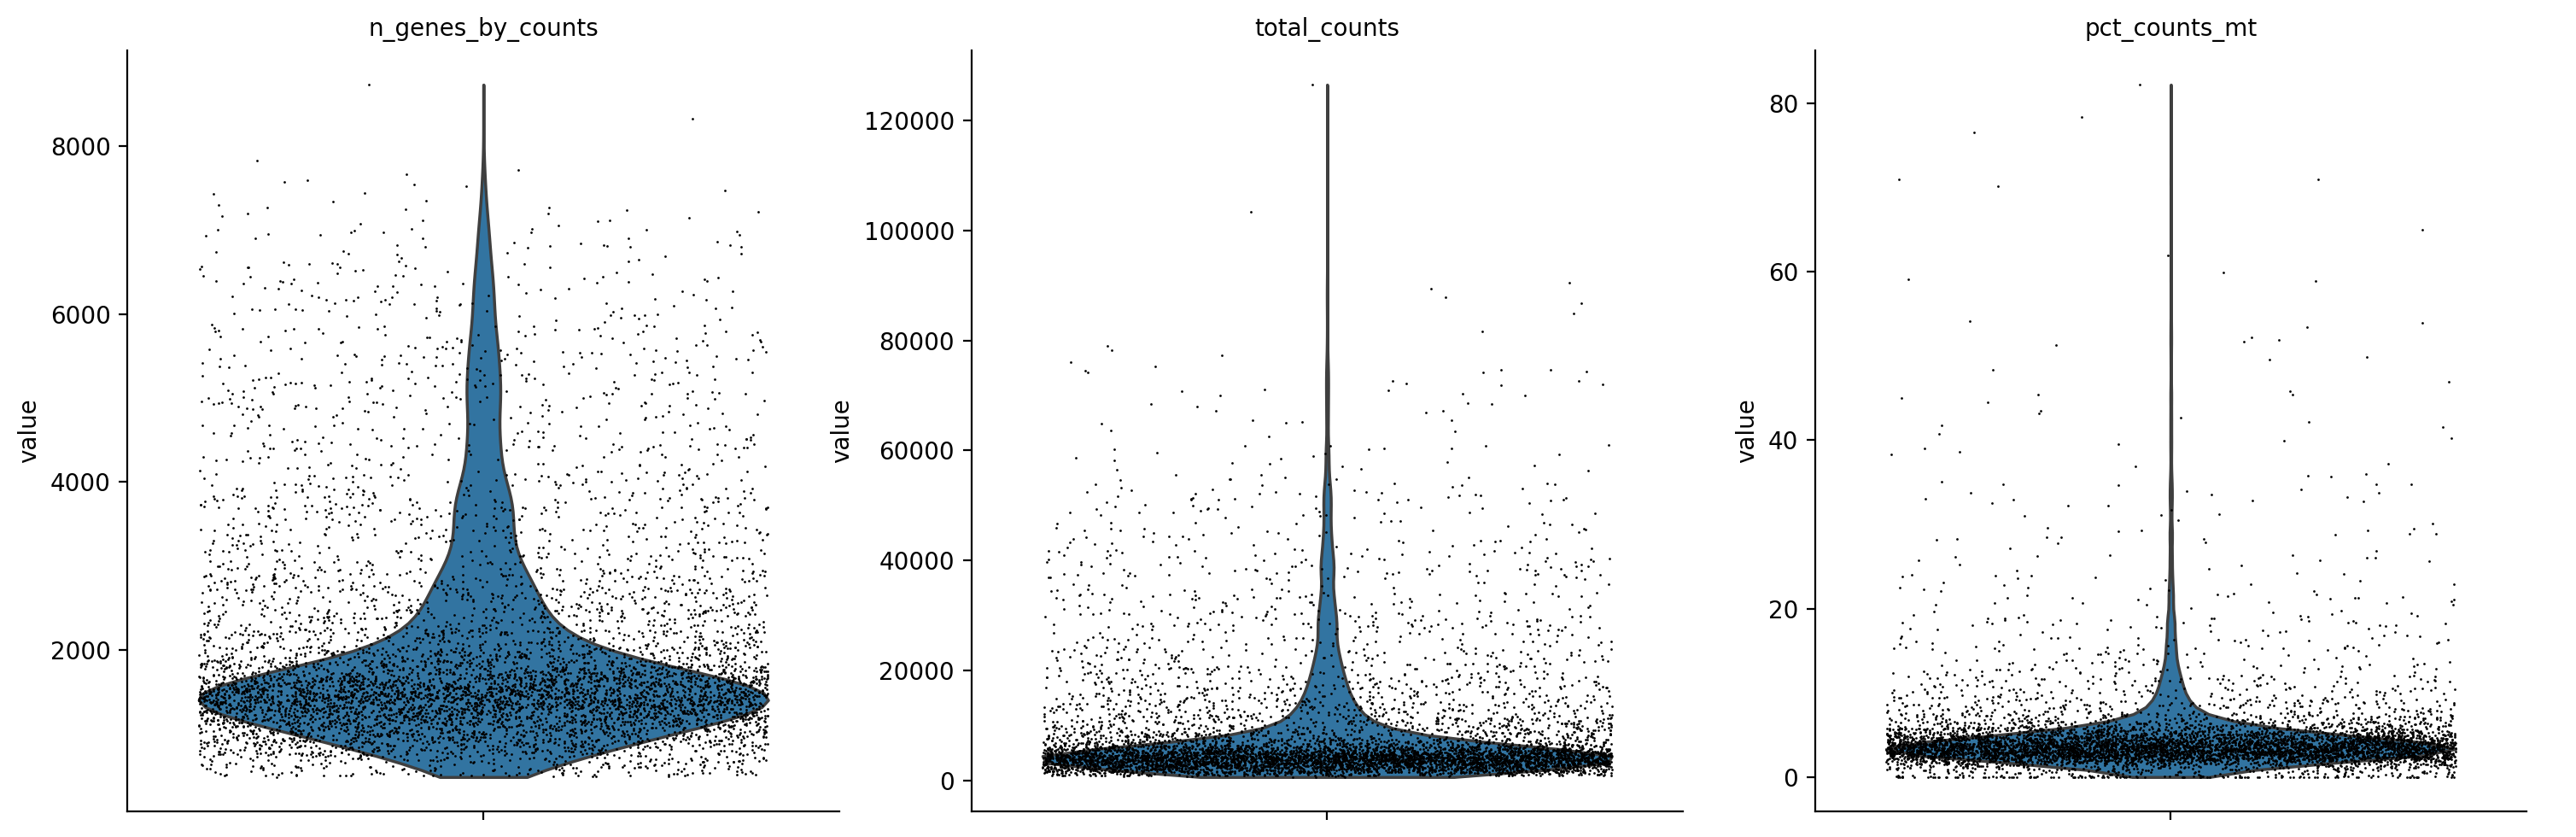

In [10]:
import seaborn as sns
import scanpy as sc

# Simplified violin plot
# sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4)

sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

In [11]:
adata = adata[adata.obs.n_genes_by_counts < 5000, :]
adata = adata[adata.obs.pct_counts_mt < 15, :]

In [13]:
adata

View of AnnData object with n_obs × n_vars = 5999 × 14553
    obs: 'multi_chain', 'is_cell', 'high_confidence', 'extra_chains', 'has_ir', 'IR_VJ_1_c_call', 'IR_VJ_2_c_call', 'IR_VDJ_1_c_call', 'IR_VDJ_2_c_call', 'IR_VJ_1_consensus_count', 'IR_VJ_2_consensus_count', 'IR_VDJ_1_consensus_count', 'IR_VDJ_2_consensus_count', 'IR_VJ_1_d_call', 'IR_VJ_2_d_call', 'IR_VDJ_1_d_call', 'IR_VDJ_2_d_call', 'IR_VJ_1_duplicate_count', 'IR_VJ_2_duplicate_count', 'IR_VDJ_1_duplicate_count', 'IR_VDJ_2_duplicate_count', 'IR_VJ_1_j_call', 'IR_VJ_2_j_call', 'IR_VDJ_1_j_call', 'IR_VDJ_2_j_call', 'IR_VJ_1_junction', 'IR_VJ_2_junction', 'IR_VDJ_1_junction', 'IR_VDJ_2_junction', 'IR_VJ_1_junction_aa', 'IR_VJ_2_junction_aa', 'IR_VDJ_1_junction_aa', 'IR_VDJ_2_junction_aa', 'IR_VJ_1_locus', 'IR_VJ_2_locus', 'IR_VDJ_1_locus', 'IR_VDJ_2_locus', 'IR_VJ_1_productive', 'IR_VJ_2_productive', 'IR_VDJ_1_productive', 'IR_VDJ_2_productive', 'IR_VJ_1_v_call', 'IR_VJ_2_v_call', 'IR_VDJ_1_v_call', 'IR_VDJ_2_v_call', 'n_genes',

/Users/ranpeng/opt/anaconda3/envs/scRNA-v2/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:206: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


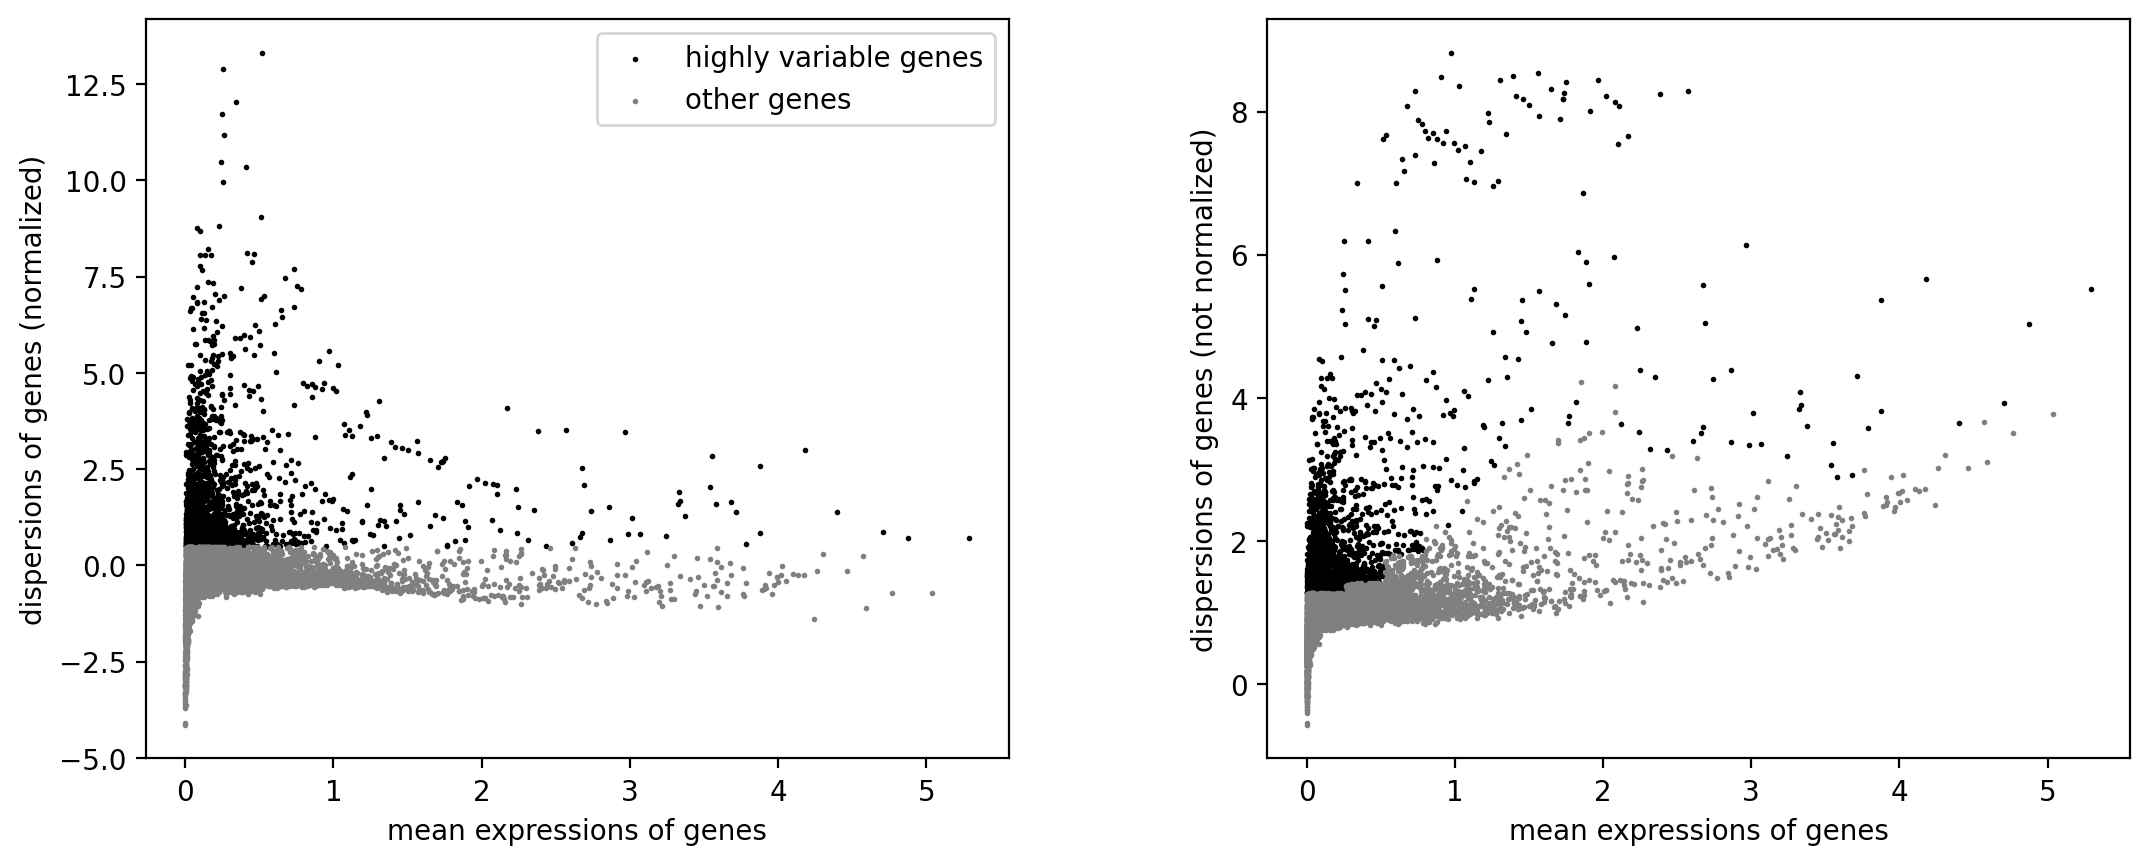

In [12]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=2000)
sc.pl.highly_variable_genes(adata)

In [13]:
adata.raw = adata
adata = adata[:, adata.var.highly_variable]
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])
sc.pp.scale(adata, max_value=10)

/Users/ranpeng/opt/anaconda3/envs/scRNA-v2/lib/python3.11/site-packages/scanpy/preprocessing/_simple.py:641: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [16]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)

In [18]:
sc.tl.leiden(adata, resolution=.5)

/var/folders/_g/sb7t66_j0j389sb96z2zd9hc0000gn/T/ipykernel_7007/3189315767.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=.5)


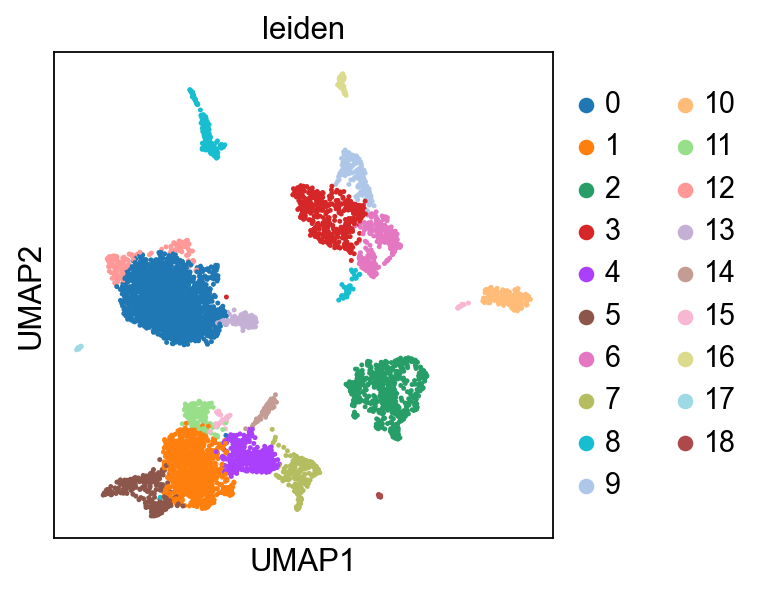

In [19]:
sc.settings.set_figure_params(figsize=(4, 4))
sc.pl.umap(adata, color=['leiden'])

In [20]:
sc.settings.set_figure_params(figsize=(4, 4))
sc.pl.umap(adata, color=['CST3', 'CD3D', 'CD19', 'TYROBP', 'CD8A', 'CD4', 'FOXP3', 'XBP1'], ncols=4)

### TCR BCR 数据处理

In [21]:
adata

AnnData object with n_obs × n_vars = 5999 × 2000
    obs: 'multi_chain', 'is_cell', 'high_confidence', 'extra_chains', 'has_ir', 'IR_VJ_1_c_call', 'IR_VJ_2_c_call', 'IR_VDJ_1_c_call', 'IR_VDJ_2_c_call', 'IR_VJ_1_consensus_count', 'IR_VJ_2_consensus_count', 'IR_VDJ_1_consensus_count', 'IR_VDJ_2_consensus_count', 'IR_VJ_1_d_call', 'IR_VJ_2_d_call', 'IR_VDJ_1_d_call', 'IR_VDJ_2_d_call', 'IR_VJ_1_duplicate_count', 'IR_VJ_2_duplicate_count', 'IR_VDJ_1_duplicate_count', 'IR_VDJ_2_duplicate_count', 'IR_VJ_1_j_call', 'IR_VJ_2_j_call', 'IR_VDJ_1_j_call', 'IR_VDJ_2_j_call', 'IR_VJ_1_junction', 'IR_VJ_2_junction', 'IR_VDJ_1_junction', 'IR_VDJ_2_junction', 'IR_VJ_1_junction_aa', 'IR_VJ_2_junction_aa', 'IR_VDJ_1_junction_aa', 'IR_VDJ_2_junction_aa', 'IR_VJ_1_locus', 'IR_VJ_2_locus', 'IR_VDJ_1_locus', 'IR_VDJ_2_locus', 'IR_VJ_1_productive', 'IR_VJ_2_productive', 'IR_VDJ_1_productive', 'IR_VDJ_2_productive', 'IR_VJ_1_v_call', 'IR_VJ_2_v_call', 'IR_VDJ_1_v_call', 'IR_VDJ_2_v_call', 'n_genes', 'n_genes

In [22]:
ir.tl.chain_qc(adata)

In [23]:
sc.pl.umap(adata, color=['receptor_type', 'receptor_subtype', 'chain_pairing'], wspace=.35)

In [24]:
## 再次理解annotation文件
adata[adata.obs.chain_pairing=='two full chains'].obs.head()

multi_chain is_cell high_confidence extra_chains has_ir  \
AACGTTGAGGGTGTGT-1       False    None            None           []   True   
ACGCCAGCAATGCCAT-1       False    None            None           []   True   
ACTTTCAGTCTAAACC-1       False    None            None           []   True   
AGCTTGAAGTTCGATC-1       False    None            None           []   True   
CAAGAAATCATAAAGG-1       False    None            None           []   True   

                   IR_VJ_1_c_call IR_VJ_2_c_call IR_VDJ_1_c_call  \
AACGTTGAGGGTGTGT-1           TRAC           TRAC           TRBC2   
ACGCCAGCAATGCCAT-1           TRAC           TRAC           TRBC1   
ACTTTCAGTCTAAACC-1           TRAC           TRAC           TRBC2   
AGCTTGAAGTTCGATC-1           TRAC           TRAC           TRBC2   
CAAGAAATCATAAAGG-1           TRAC           TRAC           TRBC1   

                   IR_VDJ_2_c_call  IR_VJ_1_consensus_count  ...  \
AACGTTGAGGGTGTGT-1           TRBC2                  11008.0  ...   
ACGCCAGCAATGCCAT-1           TRBC2                   4336.0  ...   
ACTTTCAGTCTAAACC-1           TRBC1                  10518.0  ...   
AGCTTGAAGTTCGATC-1           TRBC2                   5928.0  ...   
CAAGAAATCATAAAGG-1           TRBC1                  12554.0  ...   

                    IR_VDJ_2_v_call  n_genes  n_genes_by_counts  total_counts  \
AACGTTGAGGGTGTGT-1          TRBV6-2     2427               2412        8387.0   
ACGCCAGCAATGCCAT-1           TRBV18     2849               2827       12036.0   
ACTTTCAGTCTAAACC-1            TRBV9     2805               2794        8394.0   
AGCTTGAAGTTCGATC-1          TRBV7-9     1998               1985        5236.0   
CAAGAAATCATAAAGG-1          TRBV6-5     2713               2695        7617.0   

                    total_counts_mt pct_counts_mt leiden  receptor_type  \
AACGTTGAGGGTGTGT-1            239.0      2.849648     11            TCR   
ACGCCAGCAATGCCAT-1            327.0      2.716849      1            TCR   
ACTTTCAGTCTAAACC-1            172.0      2.049083      5            TCR   
AGCTTGAAGTTCGATC-1            187.0      3.571429      5            TCR   
CAAGAAATCATAAAGG-1            155.0      2.034922      5            TCR   

                    receptor_subtype    chain_pairing  
AACGTTGAGGGTGTGT-1           TRA+TRB  two full chains  
ACGCCAGCAATGCCAT-1           TRA+TRB  two full chains  
ACTTTCAGTCTAAACC-1           TRA+TRB  two full chains  
AGCTTGAAGTTCGATC-1           TRA+TRB  two full chains  
CAAGAAATCATAAAGG-1           TRA+TRB  two full chains  

[5 rows x 54 columns]